This blog contains notes for me to understand how to predict a model . I want to see how machine learning algorithms compare and contrast to each other.

I am evaluating 6 different algorithms in this blog :
1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN).
4. Classification and Regression Trees (CART).
5. Gaussian Naive Bayes (NB).
6. Support Vector Machines (SVM).

I decided to start with the classification of iris flowers (e.g. the iris dataset).This dataset is famous because it is used as the “hello world” dataset in machine learning and statistics by pretty much everyone.

The dataset contains 150 observations of iris flowers. There are four columns of measurements of the flowers in centimeters. The fifth column is the species of the flower observed. All observed flowers belong to one of three species.

You can learn more about this dataset on Wikipedia.




## Machine Learning Workflow



1. The general model workflow for conducting machine learning tasks is as follows. Keep in mind that the best results will often be obtained through numerous iterations of steps 2-6.

2. Acquire the data - Choose data that will help you solve a problem or seems otherwise interesting. Perform initial descriptive analysis.

3. Prepare your data - Resolve missing values, remove outliers, and transform text fields to numeric values. For supervised learning, you will have an input matrix, where each row is an observation and each column is a predictor, as well as output data in a numerical vector, character array, etc.

4. Choose your learning algorithm - Decide what you want in your algorithm (speed, interpretability, accuracy, good memory management, implement ability). Pick one algorithm or a collection.

5. Pick a validation method and examine the "fit", updating if necessary -Decide how you will measure error. If you want a better fit, try tuning the model parameters, adjusting your regularization or bias variable, or picking a new algorithm altogether.

6. Use your model for a prediction on new data. Fit your model.

## Import Libraries

In [13]:
# Load libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Load Dataset

In [3]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

## Summarise the Dataset

In [4]:
#Dimensions of Dataset
print(dataset.shape)

(150, 5)


In [6]:
#Peek at the dataset
print(dataset.head(5))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [7]:
#summary of each attribute
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [8]:
#Distribution of the class as an absolute count
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## Data Visualization

### Univariate Plots

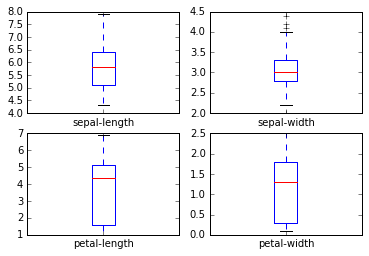

In [15]:
#box and whisker plots for the distribution of the input variables
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

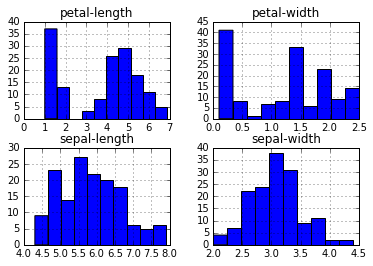

In [14]:
#Histogram of each variable
dataset.hist()
plt.show()

### Multivariate Plots

###### Interaction between the variables.


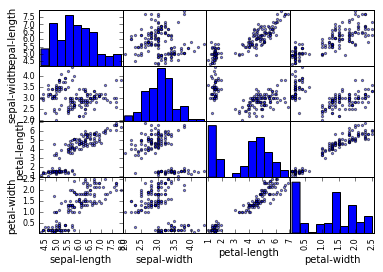

In [16]:
#Scatterplot of all pair of attributes to spot structured relationship between inpout variables
scatter_matrix(dataset)
plt.show()

## Evaluate Machine Learning Algorithms

Here is what we are going to cover in this step:

1. Separate out a validation dataset.

2. Set-up the test harness to use 10-fold cross validation.

3. Build 5 different models to predict species from flower measurements.

4. Select the best model.

Management of data flows for a specific purpose involves the modeling of some hypothesis. Those models can then be used in data products as an engine to create useful new data, as shown in the below pipeline:



### Create a Validation Dataset

In [18]:
#Split the loaded dataset into two, 80% to train model and 20% as a validation dataset.
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y, test_size=validation_size, random_state=seed)

### Test Harness

### 10-fold cross validation to estimate accuracy

In [19]:
#Split dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

Using the metric of ‘accuracy‘ to evaluate models. 

This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). 

### Build Models

In [20]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    #http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html
	kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    #http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html
	cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


### Select Best Model

KNN has the largest estimated accuracy score of 0.98333 in 6 models.

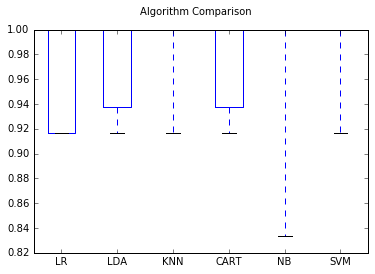

In [21]:
#Plot the evaluation result to compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Box and whisker plots are squashed at the top of the range, with many samples achieving 100% accuracy.

## Make Predictions

In [22]:
#To get an idea of the accuracy of the model on our validation set.
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
#confusion matrix provides an indication of the three errors made
print(confusion_matrix(Y_validation, predictions))
#classification report provides a breakdown of each class by precision, recall, f1-score 
# and support showing excellent results (granted the validation dataset was small).
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
             precision    recall  f1-score   support

Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
Iris-virginica       0.90      0.82      0.86        11

avg / total       0.90      0.90      0.90        30

